In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



Accuracy Scores RSS Splitting Criterion
Accuracy within 10%:
 0.44750656167979
Accuracy within 15%:
 0.6286089238845144
Accuracy within 20%:
 0.7874015748031497
[INFO]:  8 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  3.0955610275268555  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  21.667760998030204 % on  3046  instances
Labels:  ['6th' '5th' '0th' '3rd' '8th' '7th' '2nd' '9th' '4th' '1st']
Confusion matrix:  [[20, 11, 2, 11, 20, 18, 4, 12, 5, 4], [6, 18, 8, 8, 14, 11, 1, 6, 7, 7], [70, 77, 167, 102, 37, 55, 80, 13, 107, 117], [8, 11, 2, 22, 7, 7, 8, 20, 11, 4], [72, 66, 32, 28, 124, 93, 53, 66, 37, 25], [31, 19, 7, 19, 25, 40, 12, 22, 18, 6], [16, 20, 24, 17, 2, 9, 46, 0, 37, 44], [58, 43, 11, 62, 73, 65, 53, 153, 32, 23], [0, 0, 0, 1, 0, 0, 0, 0, 2, 0], [17, 29, 62, 35, 9, 19, 51, 2, 50, 68]]
Decision  6th  => Accuray:  88.0171 %, Precision:  18.6916 %, Recall: 

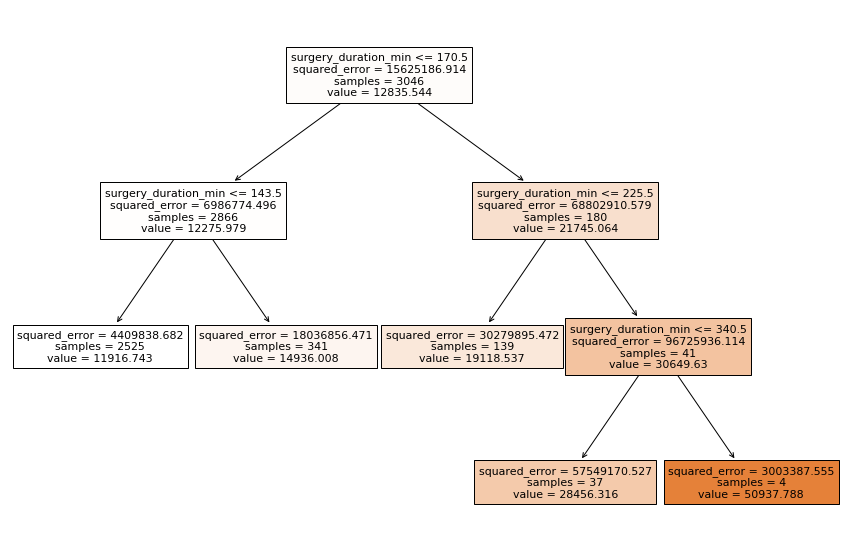

In [3]:
# Problem 1
# a) Split 80-20 test v train
    #build regression tree on RSS splitting all variables except medical ID
    # apply cost-complexity pruning algorithm to produce reasonably sized tree
    # give graphical output

# read in data
hospital=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\hospital_data.csv')
# convert gender to binary
coding={'M': 1, 'F':0}
hospital['gender']=hospital['gender'].map(coding)
# select independent and dependent variables
X=hospital.iloc[:,1:6].values
y=hospital.iloc[:,6].values


#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=348644)

#FITTING REGRESSION TREE WITH RSS SPLITTING CRITERION
rtree = DecisionTreeRegressor(random_state=907420, 
criterion="squared_error", max_leaf_nodes=5)
reg_tree_RSS = rtree.fit(X_train, y_train)

#plotting fitted tree
fig=plt.figure(figsize=(15,10))
fn=['gender', 'age', 'BMI', 'ASA', 'surgery_duration_min']
tree.plot_tree(reg_tree_RSS, feature_names=fn, filled=True)


# b) use fitted model to predict surgery cost for the testing data. Compute 
    # proportions of predicted values within 10%, 15%, 20% of the observed values

y_pred=reg_tree_RSS.predict(X_test)

ind10=[]
ind15=[]
ind20=[]     

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)
 
prop10=sum(ind10)/len(ind10)
prop15=sum(ind15)/len(ind15)
prop20=sum(ind20)/len(ind20)

print("Accuracy Scores RSS Splitting Criterion")
print("Accuracy within 10%:\n {}".format(prop10))
print("Accuracy within 15%:\n {}".format(prop15))
print("Accuracy within 20%:\n {}".format(prop20))


# c) Build regression tree on the training data based on the CHAID splitting criterion and 
    # cost-complexity pruning. Give graphical output

# convert age to deciles
hospital['deciles']=pandas.qcut(hospital['surgery_cost'], 10, labels=False)
deciles_coding={0:'0th',1:'1st',2:'2nd',3:'3rd',4:'4th',5:'5th',6:'6th',7:'7th',8:'8th',9:'9th'}
hospital['deciles']=hospital['deciles'].map(deciles_coding)

X=hospital.iloc[:,1:6].values
y=hospital.iloc[:,6:8].values


#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=348644)

X_train=pandas.DataFrame(X_train, columns=['gender','age',
'BMI','ASA','surgery_duration_min'])
y_train=pandas.DataFrame(y_train[:,1], columns=['deciles'])
train_data=pandas.concat([X_train, y_train],axis=1)

# fitting tree
from chefboost import Chefboost

config={'algorithm': 'CHAID'}
tree_chaid=Chefboost.fit(train_data, config, target_label='deciles')


# d) use chaid tree to compute accuracy within 10, 15 and 20%
#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
y_test=pandas.DataFrame(y_test[:,0], columns=['surgery_cost'])
y_pred=pandas.DataFrame(y_pred, columns=['predclass'])
pred_data=pandas.concat([y_test,y_pred],axis=1)

df_new=pred_data.groupby('predclass')['surgery_cost'].mean()#predicted value=class mean
inner_join = pandas.merge(pred_data, df_new, on='predclass', how ='inner')

ind10=[]
ind15=[]
ind20=[]     
#median_house_value_x=observed value, median_house_value_y=predicted value
for sub1, sub2 in zip(inner_join['surgery_cost_x'], inner_join['surgery_cost_y']):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub1 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub1 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub1 else ind20.append(0)
 
prop10=sum(ind10)/len(ind10)
prop15=sum(ind15)/len(ind15)
prop20=sum(ind20)/len(ind20)

print("CHAID Accuracy Scores")
print("Accuracy within 10%\n {}".format(prop10))
print("Accuracy within 15%\n {}".format(prop15))
print("Accuracy within 20%\n {}".format(prop20))


    trueclassrate  cutoff
5          0.9725    0.06
6          0.9725    0.07
7          0.9725    0.08
8          0.9725    0.09
9          0.9725    0.10
..            ...     ...
62         0.9725    0.63
63         0.9725    0.64
64         0.9725    0.65
65         0.9725    0.66
66         0.9725    0.67

[62 rows x 2 columns]
    trueclassrate  cutoff
49         0.9675    0.50
50         0.9675    0.51
51         0.9675    0.52
52         0.9675    0.53
53         0.9675    0.54
54         0.9675    0.55
55         0.9675    0.56
56         0.9675    0.57
57         0.9675    0.58
58         0.9675    0.59
59         0.9675    0.60
60         0.9675    0.61
61         0.9675    0.62
62         0.9675    0.63
63         0.9675    0.64
64         0.9675    0.65
65         0.9675    0.66
66         0.9675    0.67
67         0.9675    0.68
68         0.9675    0.69
69         0.9675    0.70
70         0.9675    0.71
71         0.9675    0.72
72         0.9675    0.73
73         0.96

KeyError: 400

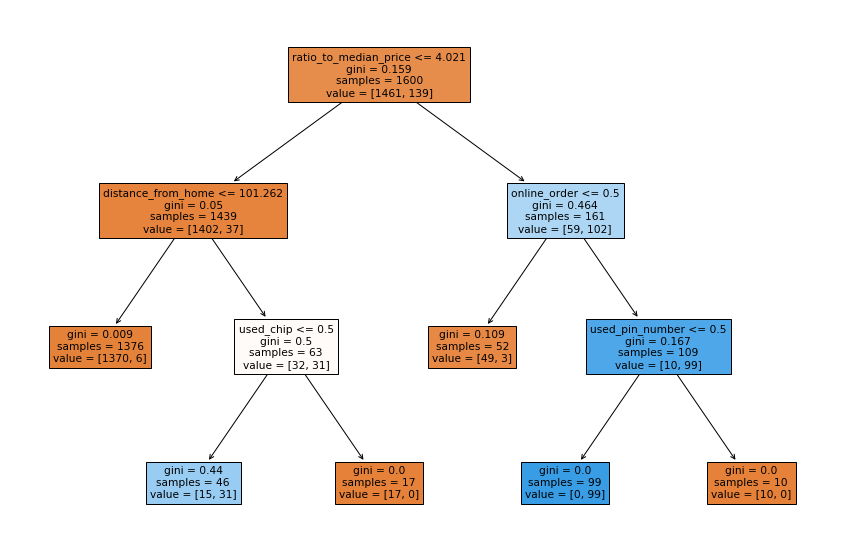

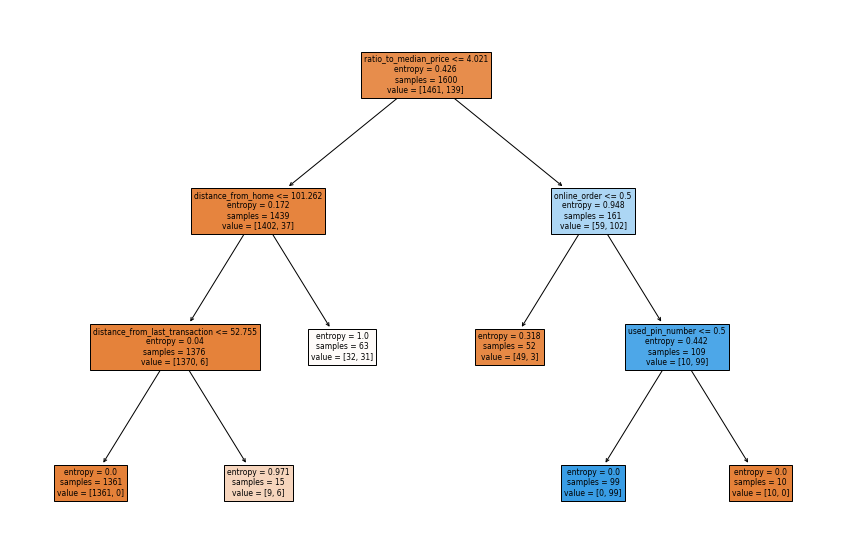

In [4]:
# Problem 2

# a) split data 80 20 to build binary classification tree for fraudulent card activity
    # using Gini criterion - prune using cost-complexity
from sklearn.tree import DecisionTreeClassifier
# read in fraud dataset
card_data=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\card_transdata.csv')

# mark predictors and predicted variables
X=card_data.iloc[:,0:7]
y=card_data.iloc[:,7]

# split data to 80% train 20% test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=289022)

#FITTING BINARY TREE WITH GINI SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=199233)
gini_tree.fit=gini_tree.fit(X_train,y_train)

#PLOTTING FITTED TREE 
fig = plt.figure(figsize=(15,10))
tree.plot_tree(gini_tree.fit, feature_names=['distance_from_home','distance_from_last_transaction',
'ratio_to_median_price','repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'], filled=True)


# b) compute prediction accuracy for training data using range of classification 0.01 and 0.99
#COMPUTING PREDICTION ACCURACY FOR TESTING DATA 
y_pred=gini_tree.predict_proba(X_test)


#y_pred[::,1] are predicted probabilities of "yes"

total=len(y_pred)
trueclassrate=[]
cutoff=[]

for i in range(99):
    tp=0
    tn=0
    cutoff.append(0.01*(i+1))
    for sub1, sub2 in zip(y_pred[::,1], y_test):
        tp_ind=1 if (sub1>0.01*(i+1) and sub2==1) else 0
        tn_ind=1 if (sub1<0.01*(i+1) and sub2==0) else 0
        tp+=tp_ind
        tn+=tn_ind
    rate=(tp+tn)/total
    trueclassrate.append(rate)
    
df=pandas.DataFrame({'trueclassrate': trueclassrate,'cutoff': cutoff})
max_rate=max(trueclassrate)
optimal=df[df['trueclassrate']==max_rate]
print(optimal)



# c) fit the binary classification tree using entropy splitting criterion and cost-complexity prunning algorithm 
    # plot tree

#FITTING BINARY TREE WITH ENTROPY SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='entropy', random_state=199233)
gini_tree.fit=gini_tree.fit(X_train,y_train)

#PLOTTING FITTED TREE 
fig = plt.figure(figsize=(15,10))
tree.plot_tree(gini_tree.fit, feature_names=['distance_from_home','distance_from_last_transaction',
'ratio_to_median_price','repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'], filled=True)


# d) compute prediction accuracy of entropy tree ranging 0.01 to 0.99

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA 
y_pred=gini_tree.predict_proba(X_test)

#y_pred[::,1] are predicted probabilities of "yes"

total=len(y_pred)
trueclassrate=[]
cutoff=[]

for i in range(99):
    tp=0
    tn=0
    cutoff.append(0.01*(i+1))
    for sub1, sub2 in zip(y_pred[::,1], y_test):
        tp_ind=1 if (sub1>0.01*(i+1) and sub2==1) else 0
        tn_ind=1 if (sub1<0.01*(i+1) and sub2==0) else 0
        tp+=tp_ind
        tn+=tn_ind
    rate=(tp+tn)/total
    trueclassrate.append(rate)
    

df=pandas.DataFrame({'trueclassrate': trueclassrate,'cutoff': cutoff})
max_rate=max(trueclassrate)
optimal=df[df['trueclassrate']==max_rate]
print(optimal)



# e) fit binary classification tree using CHAID criterion and cost-complexity pruning 
    # display tree

train_data=pandas.concat([X_train, y_train], axis=1) #one-to-one concatenation


config={'algorithm': 'CHAID', 'max_depth': 4}
tree_chaid=Chefboost.fit(train_data, config, target_label='fraud')

# f) compute prediction accuracy of CHAID binary tree


X_test=pandas.DataFrame(X_test, columns=['distance_from_home','distance_from_last_transaction',
'ratio_to_median_price','repeat_retailer','used_chip', 'used_pin_number','online_order'])

y_pred=[]
for i in range(len(y_test)):
    y_pred.append(Chefboost.predict(tree_chaid, X_test.iloc[i,:]))
    
y_test=pandas.DataFrame(y_test,columns=['fraud'])
y_pred=pandas.DataFrame(y_pred,columns=['predicted'])
df=pandas.concat([y_test,y_pred],axis=1)


match=[]
for i in range(len(df)):
    if df['fraud'][i] == df['predicted'][i]: 
        match.append(1)
    else:
        match.append(0)
    
trueclassrate=sum(match)/len(match)

print(trueclassrate)


In [46]:
# Problem 3

# using gini classification tree from problem 2 - card_data

# a) compute confustion matrix 0.5 cutoff point

card_data=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\card_transdata.csv')

# mark predictors and predicted variables
X=card_data.iloc[:,0:7]
y=card_data.iloc[:,7]

# split data to 80% train 20% test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=289022)

#FITTING BINARY TREE WITH GINI SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=199233)
gini_tree.fit=gini_tree.fit(X_train,y_train)

#COMPUTING CONFUSION MATRIX AND PERFORMANCE MEASURES FOR TESTING SET
y_pred=gini_tree.predict_proba(X_test)

total=len(y_pred)

tpos=[]
fpos=[]
tneg=[]
fneg=[]

for sub1, sub2 in zip(y_pred[::,1], y_test):
    tpos.append(1) if (sub1>0.5 and sub2==1) else tpos.append(0)
    fpos.append(1) if (sub1>0.5 and sub2==0) else fpos.append(0)
    tneg.append(1) if (sub1<0.5 and sub2==0) else tneg.append(0)
    fneg.append(1) if (sub1<0.5 and sub2==1) else fneg.append(0)
    tp=sum(tpos)
    fp=sum(fpos)
    tn=sum(tneg)
    fn=sum(fneg)
    
print('tp:', tp)
print('fp:', fp)
print('tn:', tn)
print('fn:', fn)
print('total:', total)


# b) compute prediction  performance measures

accuracy=(tp+tn)/total
misclassrate=(fp+fn)/total
sensitivity=tp/(tp+fn)
FNR=fn/(tp+fn)
specificity=tn/(fp+tn)
FPR=fp/(fp+tn)
precision=tp/(tp+fp)
NPV=tn/(fn+tn)
F1score=2*tp/(2*tp+fn+fp)

print('accuracy:', accuracy)
print('misclassrate:', misclassrate)
print('sensitivity:', sensitivity)
print('FNR:', FNR)
print('specificity:', specificity)
print('FPR:', FPR)
print('precision:', precision)
print('NPV:', NPV)
print('F1score:', F1score)



tp: 31
fp: 4
tn: 358
fn: 7
total: 400
accuracy: 0.9725
misclassrate: 0.0275
sensitivity: 0.8157894736842105
FNR: 0.18421052631578946
specificity: 0.988950276243094
FPR: 0.011049723756906077
precision: 0.8857142857142857
NPV: 0.9808219178082191
F1score: 0.8493150684931506


Optimal
    accuracy  misclassrate  sensitivity  specificity  oneminusspec  distance  \
0      0.95          0.05     0.842105     0.961326      0.038674  0.162562   
1      0.95          0.05     0.842105     0.961326      0.038674  0.162562   
2      0.95          0.05     0.842105     0.961326      0.038674  0.162562   
3      0.95          0.05     0.842105     0.961326      0.038674  0.162562   
4      0.95          0.05     0.842105     0.961326      0.038674  0.162562   

   cut-off  
0     0.01  
1     0.02  
2     0.03  
3     0.04  
4     0.05  
AUC
 0.031041000290782203


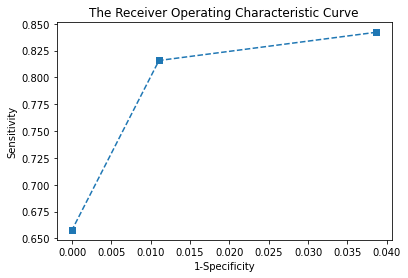

In [8]:
# Problem 4
# using Gini classification tree from problem 2

# a) compute prediction accuracy, misclassification rate, sensitivity and specificity 
    # for range of cut-offs between 0.01 and 0.99

card_data=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\card_transdata.csv')

# mark predictors and predicted variables
X=card_data.iloc[:,0:7]
y=card_data.iloc[:,7]

# split data to 80% train 20% test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=289022)


#FITTING BINARY TREE WITH GINI SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=199233)
gini_tree.fit=gini_tree.fit(X_train,y_train)


#COMPUTING CONFUSION MATRICES AND PERFORMANCE MEASURES FOR TESTING SET FOR A RANGE OF CUTOFFS
y_pred=gini_tree.predict_proba(X_test)

total=len(y_pred)

cutoff=[]
accuracy=[]
misclassrate=[]
sensitivity=[]
specificity=[]
oneminusspec=[]
distance=[]

for i in range(99):
    tp=0
    fp=0
    tn=0
    fn=0
    cutoff.append(0.01*(i+1))
    for sub1, sub2 in zip(y_pred[::,1], y_test):
        tp_ind=1 if (sub1>0.01*(i+1) and sub2==1) else 0
        fp_ind=1 if (sub1>0.01*(i+1) and sub2==0) else 0
        tn_ind=1 if (sub1<0.01*(i+1) and sub2==0) else 0
        fn_ind=1 if (sub1<0.01*(i+1) and sub2==1) else 0
        tp+=tp_ind
        fp+=fp_ind
        tn+=tn_ind
        fn+=fn_ind
        
    accuracy_i=(tp+tn)/total
    misclassrate_i=(fp+fn)/total
    sensitivity_i=tp/(tp+fn)
    specificity_i=tn/(fp+tn)
    oneminusspec_i=fp/(fp+tn) 
    distance_i=numpy.sqrt(pow(oneminusspec_i,2)+pow(1-sensitivity_i,2))
    
    accuracy.append(accuracy_i)
    misclassrate.append(misclassrate_i)
    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)
    oneminusspec.append(oneminusspec_i)
    distance.append(distance_i)
    
#PLOTTING ROC CURVE
import matplotlib.pyplot as plot
plt.plot(oneminusspec, sensitivity, linestyle='--', marker='s')
plt.title('The Receiver Operating Characteristic Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

#REPORTING MEASURES FOR THE POINT ON ROC CURVE CLOSEST TO THE IDEAL POINT (0,1)
df=pandas.DataFrame({'accuracy': accuracy,'misclassrate': misclassrate,'sensitivity':
sensitivity,'specificity': specificity, 'oneminusspec': oneminusspec,'distance': distance,'cut-off': cutoff})
min_distance=min(distance)
optimal=df[df['distance']==min_distance]
print("Optimal\n {}".format(optimal))

#COMPUTING AREA UNDER THE ROC CURVE
df=df.sort_values('oneminusspec', ascending=True) 
df['lagx']=df['oneminusspec'].shift(1)
df['lagy']=df['sensitivity'].shift(1)
df['lagx']=numpy.nan_to_num(df['lagx'],nan=0)
df['lagy']=numpy.nan_to_num(df['lagy'],nan=0)
df['trapezoid']=(df['oneminusspec']-df['lagx'])*(df['sensitivity']+df['lagy'])/2;
AUC=sum(df['trapezoid'])
print("AUC\n {}".format(AUC))



PERFORMANCE MEASURES FOR FITTED GINI TREE
CLASS MEASURES:

CLASS: 1
tp: 19
fp: 0
tn: 84
fn: 2
accuracy: 0.9809523809523809
misclassrate: 0.01904761904761905
sensitivity: 0.9047619047619048
FNR: 0.09523809523809523
specificity: 1.0
FPR: 0.0
precision: 1.0
NPV: 0.9767441860465116
F1score: 0.95

CLASS: 2
tp: 50
fp: 7
tn: 42
fn: 6
accuracy: 0.8761904761904762
misclassrate: 0.12380952380952381
sensitivity: 0.8928571428571429
FNR: 0.10714285714285714
specificity: 0.8571428571428571
FPR: 0.14285714285714285
precision: 0.8771929824561403
NPV: 0.875
F1score: 0.8849557522123894

CLASS: 3
tp: 23
fp: 6
tn: 71
fn: 5
accuracy: 0.8952380952380953
misclassrate: 0.10476190476190476
sensitivity: 0.8214285714285714
FNR: 0.17857142857142858
specificity: 0.922077922077922
FPR: 0.07792207792207792
precision: 0.7931034482758621
NPV: 0.9342105263157895
F1score: 0.8070175438596491


ZeroDivisionError: division by zero

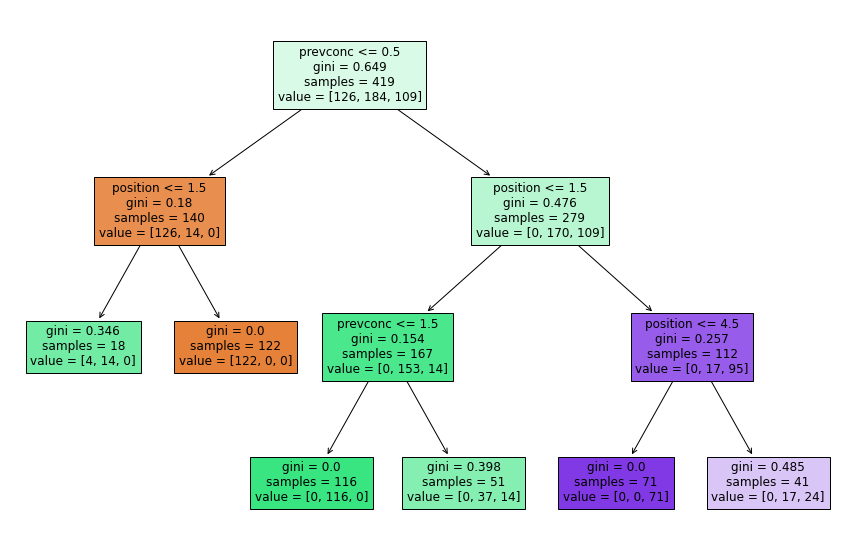

In [7]:
# Problem 5
    # a) multinomial classification tree using gini splitting criterion
        # compute prediction performance measures - micro, macro, and weighted measures

import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

concussion_data=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\concussions_data.csv')

code_position={'Offensive Lineman': 1, 'Cornerback': 2, 'Running Back': 3,'Wide Receiver': 4,
'Quarterback': 5}
code_concussion={'mild': 1, 'moderate': 2, 'severe': 3}
concussion_data['position']=concussion_data['position'].map(code_position)
concussion_data['concussion']=concussion_data['concussion'].map(code_concussion)


X=concussion_data.iloc[:,0:4]
y=concussion_data.iloc[:,4]

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=599555)

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=687088)

#########################################################################

#DEFINING FUNCTION FOR COMPUTING PERFORMANCE MEASURES
def perf_measures():
    
    #COMPUTING PERFORMANCE MEASURES FOR INDIVIDUAL CLASSES
    tp=[]
    fp=[]
    tn=[]
    fn=[]

    for cls in range(0,5):
        tp_sum=0
        fp_sum=0
        tn_sum=0
        fn_sum=0
        for sub1, sub2 in zip(predclass, y_test):
            
            if sub1==cls+1 and sub2==cls+1:
                tp_class=1
                tp_sum+=tp_class
            else:
                tp_class=0
            
            if sub1==cls+1 and sub2!=cls+1:
                fp_class=1
                fp_sum+=fp_class
            
            else:
                fp_class=0  
            
            if sub1!=cls+1 and sub2!=cls+1:
                tn_class=1
                tn_sum+=tn_class
            else:
                tn_class=0

            if sub1!=cls+1 and sub2==cls+1:
                fn_class=1
                fn_sum+=fn_class
            else:
                fn_class=0
       
        tp.append(tp_sum)
        fp.append(fp_sum)
        tn.append(tn_sum)
        fn.append(fn_sum)


    accuracy=[]
    misclassrate=[]
    sensitivity=[]
    FNR=[]
    specificity=[]
    FPR=[]
    precision=[]
    NPV=[]
    F1score=[]    

    print('CLASS MEASURES:')
    for cls in range(5):
        accuracy_cls=(tp[cls]+tn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        misclassrate_cls=(fp[cls]+fn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        sensitivity_cls=tp[cls]/(tp[cls]+fn[cls])
        FNR_cls=fn[cls]/(tp[cls]+fn[cls])
        specificity_cls=tn[cls]/(fp[cls]+tn[cls])
        FPR_cls=fp[cls]/(fp[cls]+tn[cls])
        if tp[cls]+fp[cls]==0:
            precision_cls=0
        else:
            precision_cls=tp[cls]/(tp[cls]+fp[cls])
        NPV_cls=tn[cls]/(fn[cls]+tn[cls])
        F1score_cls=2*tp[cls]/(2*tp[cls]+fn[cls]+fp[cls])
    
        accuracy.append(accuracy_cls)
        misclassrate.append(misclassrate_cls)
        sensitivity.append(sensitivity_cls)
        FNR.append(FNR_cls)
        specificity.append(specificity_cls)
        FPR.append(FPR_cls)
        precision.append(precision_cls)
        NPV.append(NPV_cls)
        F1score.append(F1score_cls)
    
        print()
        print('CLASS:', cls+1)
        print('tp:', tp[cls])
        print('fp:', fp[cls])
        print('tn:', tn[cls])
        print('fn:', fn[cls])
        print('accuracy:', accuracy[cls])
        print('misclassrate:', misclassrate[cls])
        print('sensitivity:', sensitivity[cls])
        print('FNR:', FNR[cls])
        print('specificity:', specificity[cls])
        print('FPR:', FPR[cls])
        print('precision:', precision[cls])
        print('NPV:', NPV[cls])
        print('F1score:', F1score[cls])
    
    #COMPUTING MICRO MEASURES 
    tp_sum=numpy.sum(tp)
    fp_sum=numpy.sum(fp)
    tn_sum=numpy.sum(tn)
    fn_sum=numpy.sum(fn)

    print()
    print('MICRO MEASURES:')
    accuracy_micro=(tp_sum+tn_sum)/(tp_sum+fp_sum+tn_sum+fn_sum)
    misclassrate_micro=(fp_sum+fn_sum)/(tp_sum+fp_sum+tn_sum+fn_sum)
    sensitivity_micro=tp_sum/(tp_sum+fn_sum)
    FNR_micro=fn_sum/(tp_sum+fn_sum)
    specificity_micro=tn_sum/(fp_sum+tn_sum)
    FPR_micro=fp_sum/(fp_sum+tn_sum)
    precision_micro=tp_sum/(tp_sum+fp_sum)
    NPV_micro=tn_sum/(fn_sum+tn_sum)
    F1score_micro=2*tp_sum/(2*tp_sum+fn_sum+fp_sum)

    print('accuracy:', accuracy_micro)
    print('misclassrate:', misclassrate_micro)
    print('sensitivity:', sensitivity_micro)
    print('FNR:', FNR_micro)
    print('specificity:', specificity_micro)
    print('FPR:', FPR_micro)
    print('precision:', precision_micro)
    print('NPV:', NPV_micro)
    print('F1-score:', F1score_micro)
      
    #COMPUTING MACRO MEASURES
    accuracy_macro=numpy.mean(accuracy)
    misclassrate_macro=numpy.mean(misclassrate)
    sensitivity_macro=numpy.mean(sensitivity)
    FNR_macro=numpy.mean(FNR)
    specificity_macro=numpy.mean(specificity)
    FPR_macro=numpy.mean(FPR)
    precision_macro=numpy.mean(precision)
    NPV_macro=numpy.mean(NPV)
    F1score_macro=numpy.mean(F1score)

    print()
    print('MACRO MEASURES:')
    print('accuracy:', accuracy_macro)
    print('misclassrate:', misclassrate_macro)
    print('sensitivity:', sensitivity_macro)
    print('FNR:', FNR_macro)
    print('specificity:', specificity_macro)
    print('FPR:', FPR_macro)
    print('precision:', precision_macro)
    print('NPV:', NPV_macro)
    print('F1-score:', F1score_macro)

    #COMPUTING WEIGHTED MACRO MEASURES
    weight=[]

    for cls in range(5):
        weight_cls=(tp[cls]+fn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        weight.append(weight_cls)

    accuracy_wmacro=numpy.dot(weight,accuracy)
    misclassrate_wmacro=numpy.dot(weight,misclassrate)
    sensitivity_wmacro=numpy.dot(weight,sensitivity)
    FNR_wmacro=numpy.dot(weight,FNR)
    specificity_wmacro=numpy.dot(weight,specificity)
    FPR_wmacro=numpy.dot(weight,FPR)
    precision_wmacro=numpy.dot(weight,precision)
    NPV_wmacro=numpy.dot(weight,NPV)
    F1score_wmacro=numpy.dot(weight,F1score)

    print()
    print('WEIGHTED MACRO MEASURES:')
    print('accuracy:', accuracy_wmacro)
    print('misclassrate:', misclassrate_wmacro)
    print('sensitivity:', sensitivity_wmacro)
    print('FNR:', FNR_wmacro)
    print('specificity:', specificity_wmacro)
    print('FPR:', FPR_wmacro)
    print('precision:', precision_wmacro)
    print('NPV:', NPV_wmacro)
    print('F1-score:', F1score_wmacro)

#########################################################################

#FITTING MULTINOMIAL CLASSIFICATION TREE WITH GINI SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=707720)
gini_tree.fit=gini_tree.fit(X_train,y_train)

#PLOTTING FITTED TREE 
fig=plt.figure(figsize=(15,10))
tree.plot_tree(gini_tree.fit, feature_names=['age','nyearsplaying','position','prevconc'], filled=True)


#COMPUTING PREDICTED VALUES FOR TESTING DATA
y_pred=gini_tree.predict_proba(X_test) 

#DETERMINING PREDICTED CLASSES
predclass=[]
for i  in range(0, len(y_pred)):
    list=[y_pred[i,0],y_pred[i,1], y_pred[i,2]]
    predclass.append(list.index(max(list))+1)
predclass=numpy.asarray(predclass)
    
#COMPUTING PERFORMANCE MEASURES FOR FITTED GINI TREE
print()
print('PERFORMANCE MEASURES FOR FITTED GINI TREE')
perf_measures()


